# freud.diffraction.DiffractionPattern

The `freud.diffraction.DiffractionPattern` class computes a diffraction pattern, which is a 2D image of the [static structure factor](https://en.wikipedia.org/wiki/Structure_factor) $S(\vec{k})$ of a set of points.

In [1]:
import freud
import matplotlib.pyplot as plt
import numpy as np
import rowan

First, we generate a sample system, a face-centered cubic crystal with some noise.

In [2]:
box, points = freud.data.UnitCell.fcc().generate_system(
    num_replicas=10, sigma_noise=0.02
)

Now we create a `DiffractionPattern` compute object.

In [3]:
dp = freud.diffraction.DiffractionPattern(grid_size=1024, output_size=1024)

Next, we use the `compute` method and plot the result. We use a view orientation with the identity quaternion `[1, 0, 0, 0]` so the view is aligned down the z-axis.

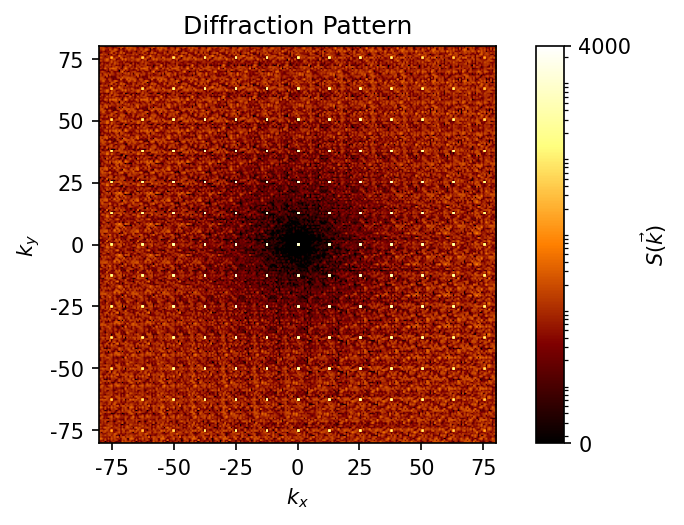

In [4]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
dp.compute((box, points), view_orientation=[1, 0, 0, 0])
dp.plot(ax)
plt.show()

We can also use a random quaternion for the view orientation to see what the diffraction looks like from another axis.

Looking down the axis: [0.75707404 0.33639217 0.56007071]


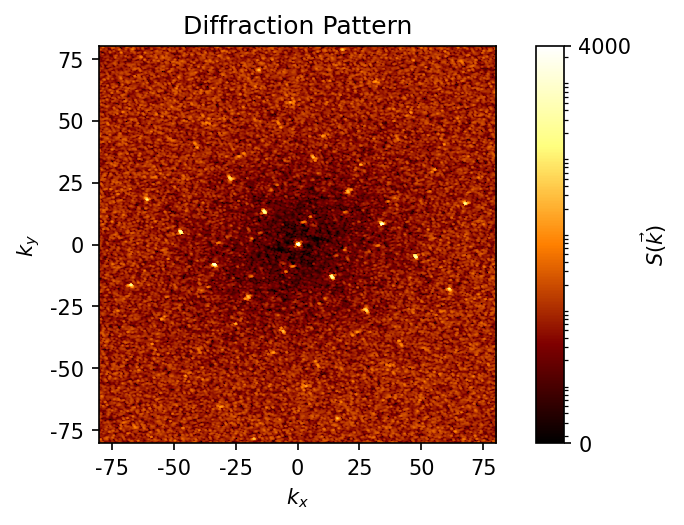

In [5]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
np.random.seed(0)
view_orientation = rowan.random.rand()
dp.compute((box, points), view_orientation=view_orientation)
print("Looking down the axis:", rowan.rotate(view_orientation, [0, 0, 1]))
dp.plot(ax)
plt.show()

The `DiffractionPattern` object also provides $\vec{k}$ vectors in the original 3D space and the magnitudes of $k_x$ and $k_y$ in the 2D projection along the view axis.

In [6]:
print("Magnitudes of k_x and k_y along the plot axes:")
print(dp.k_values[:5], "...", dp.k_values[-5:])

Magnitudes of k_x and k_y along the plot axes:
[-80.42477193 -80.2676923  -80.11061267 -79.95353303 -79.7964534 ] ... [79.63937377 79.7964534  79.95353303 80.11061267 80.2676923 ]


In [7]:
print("3D k-vectors corresponding to each pixel of the diffraction image:")
print("Array shape:", dp.k_vectors.shape)
print("Center value: k =", dp.k_vectors[dp.output_size // 2, dp.output_size // 2, :])
print("Top-left value: k =", dp.k_vectors[0, 0, :])

3D k-vectors corresponding to each pixel of the diffraction image:
Array shape: (1024, 1024, 3)
Center value: k = [0. 0. 0.]
Top-left value: k = [ 59.80552591 -93.55119119 -24.65282088]


We can also measure the diffraction of a random system (note: this is an ideal gas, not a liquid-like system, because the particles have no volume exclusion or repulsion). Note that the peak at $\vec{k} = 0$ persists. The diffraction pattern returned by this class is normalized by dividing by the number of points $N$, so $S(\vec{k}=0) = N$ after normalization.

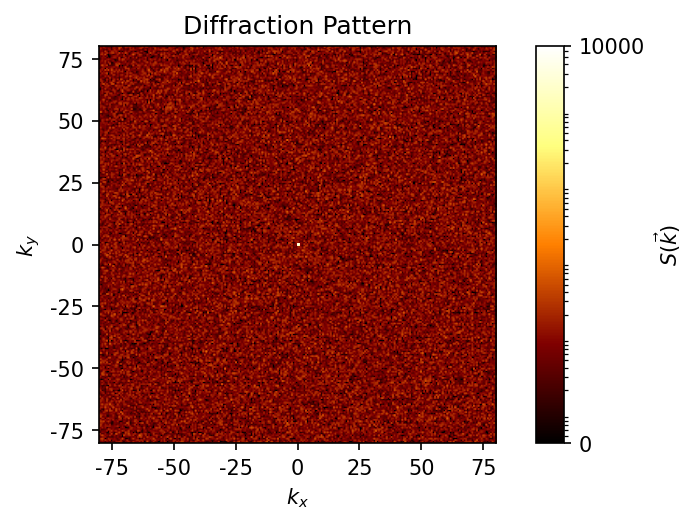

In [8]:
box, points = freud.data.make_random_system(box_size=10, num_points=10000)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
dp.compute((box, points))
dp.plot(ax)
plt.show()